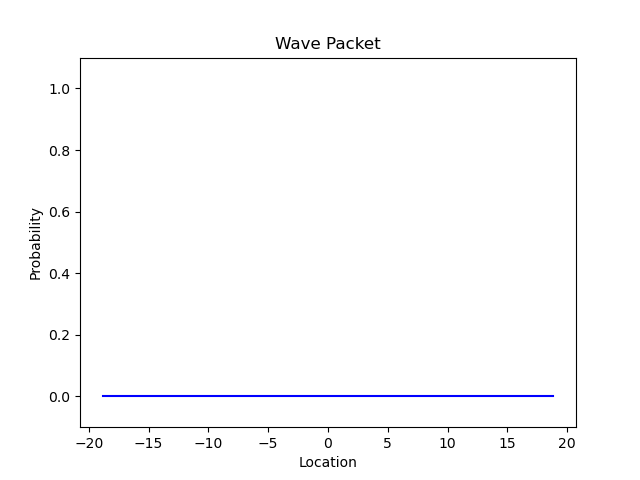

In [1]:
# wave_packet.ipynb
# Cell 1

%matplotlib widget

from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

num_waves = 1


def plot(ax):
    global xa, wave_data, wave_packet

    xa = np.linspace(-6 * np.pi, 6 * np.pi, 600)

    wave_data = np.zeros((num_waves, 600))

    for i in range(0, num_waves):
        f = 2 * (i / num_waves - 0.5)
        wave_data[i] = np.cos(f * xa) ** 2

    ya = np.sum(wave_data[:0], axis=0)

    (wave_packet,) = ax.plot(xa, ya, color="blue")

    ax.set_title(f"Wave Packet")
    ax.set_xlabel("Location")
    ax.set_ylabel("Probability")
    ax.set_ylim(-0.1, 1.1)


def anim_frame_counter():
    n = 0
    while n < num_waves:
        n += 1
        yield n


def anim_draw_frame(n):
    ya = np.sum(wave_data[:n], axis=0) / n
    wave_packet.set_data(xa, ya)
    return wave_packet


def plot_waves():
    global anim

    plt.close("all")
    fig = plt.figure(label=" ")
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])

    plot(ax)

    anim = FuncAnimation(
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
    )

    plt.show()


plot_waves()

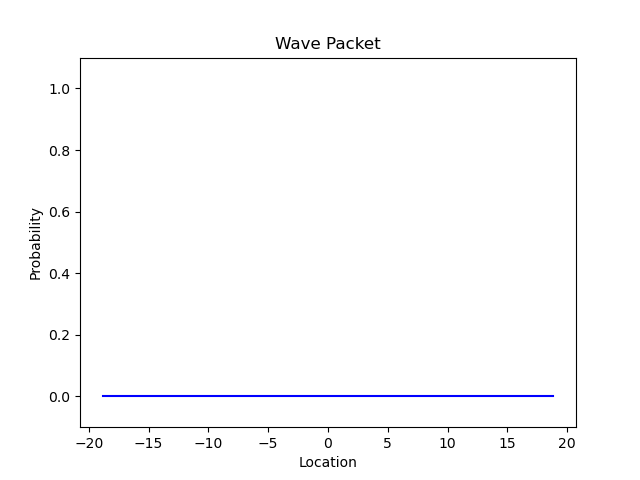

In [2]:
# Cell 2
num_waves = 3
plot_waves()

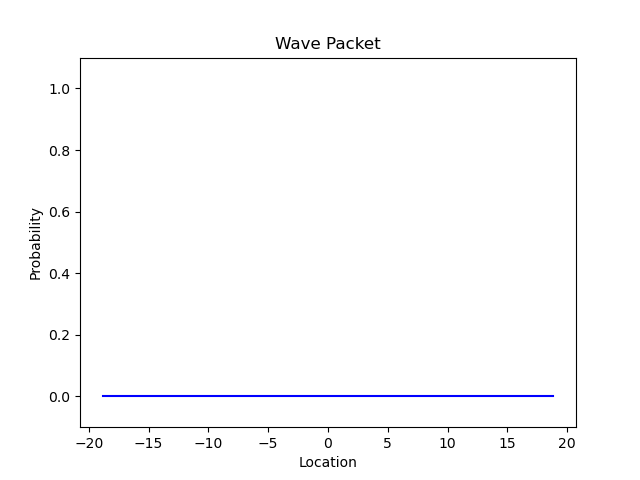

In [3]:
# Cell 3
num_waves = 11
plot_waves()

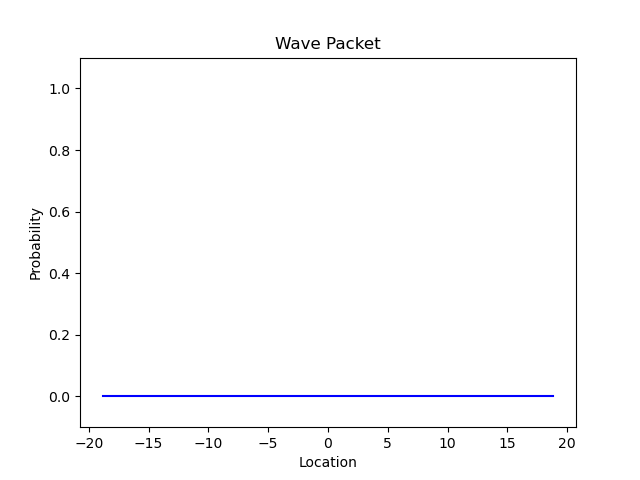

In [4]:
# Cell 4
num_waves = 600
plot_waves()